In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
from nltk.stem import WordNetLemmatizer
import string

In [2]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


#### Summary Statistics

In [4]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

In [6]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

Text(0.5, 1.0, 'Count of Product Categories')

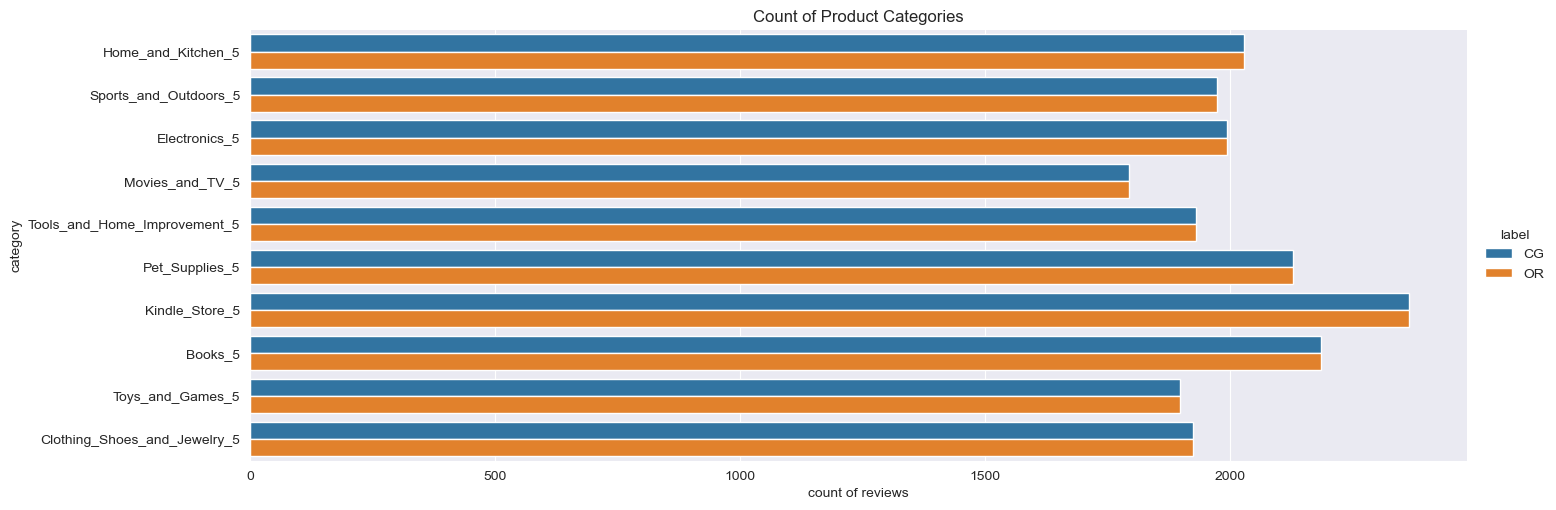

In [34]:
sns.catplot(y ='category',kind="count", hue = "label", data=df,  height=5, aspect=3)
plt.ylabel("category")
plt.xlabel("count of reviews")
plt.title("Count of Product Categories")

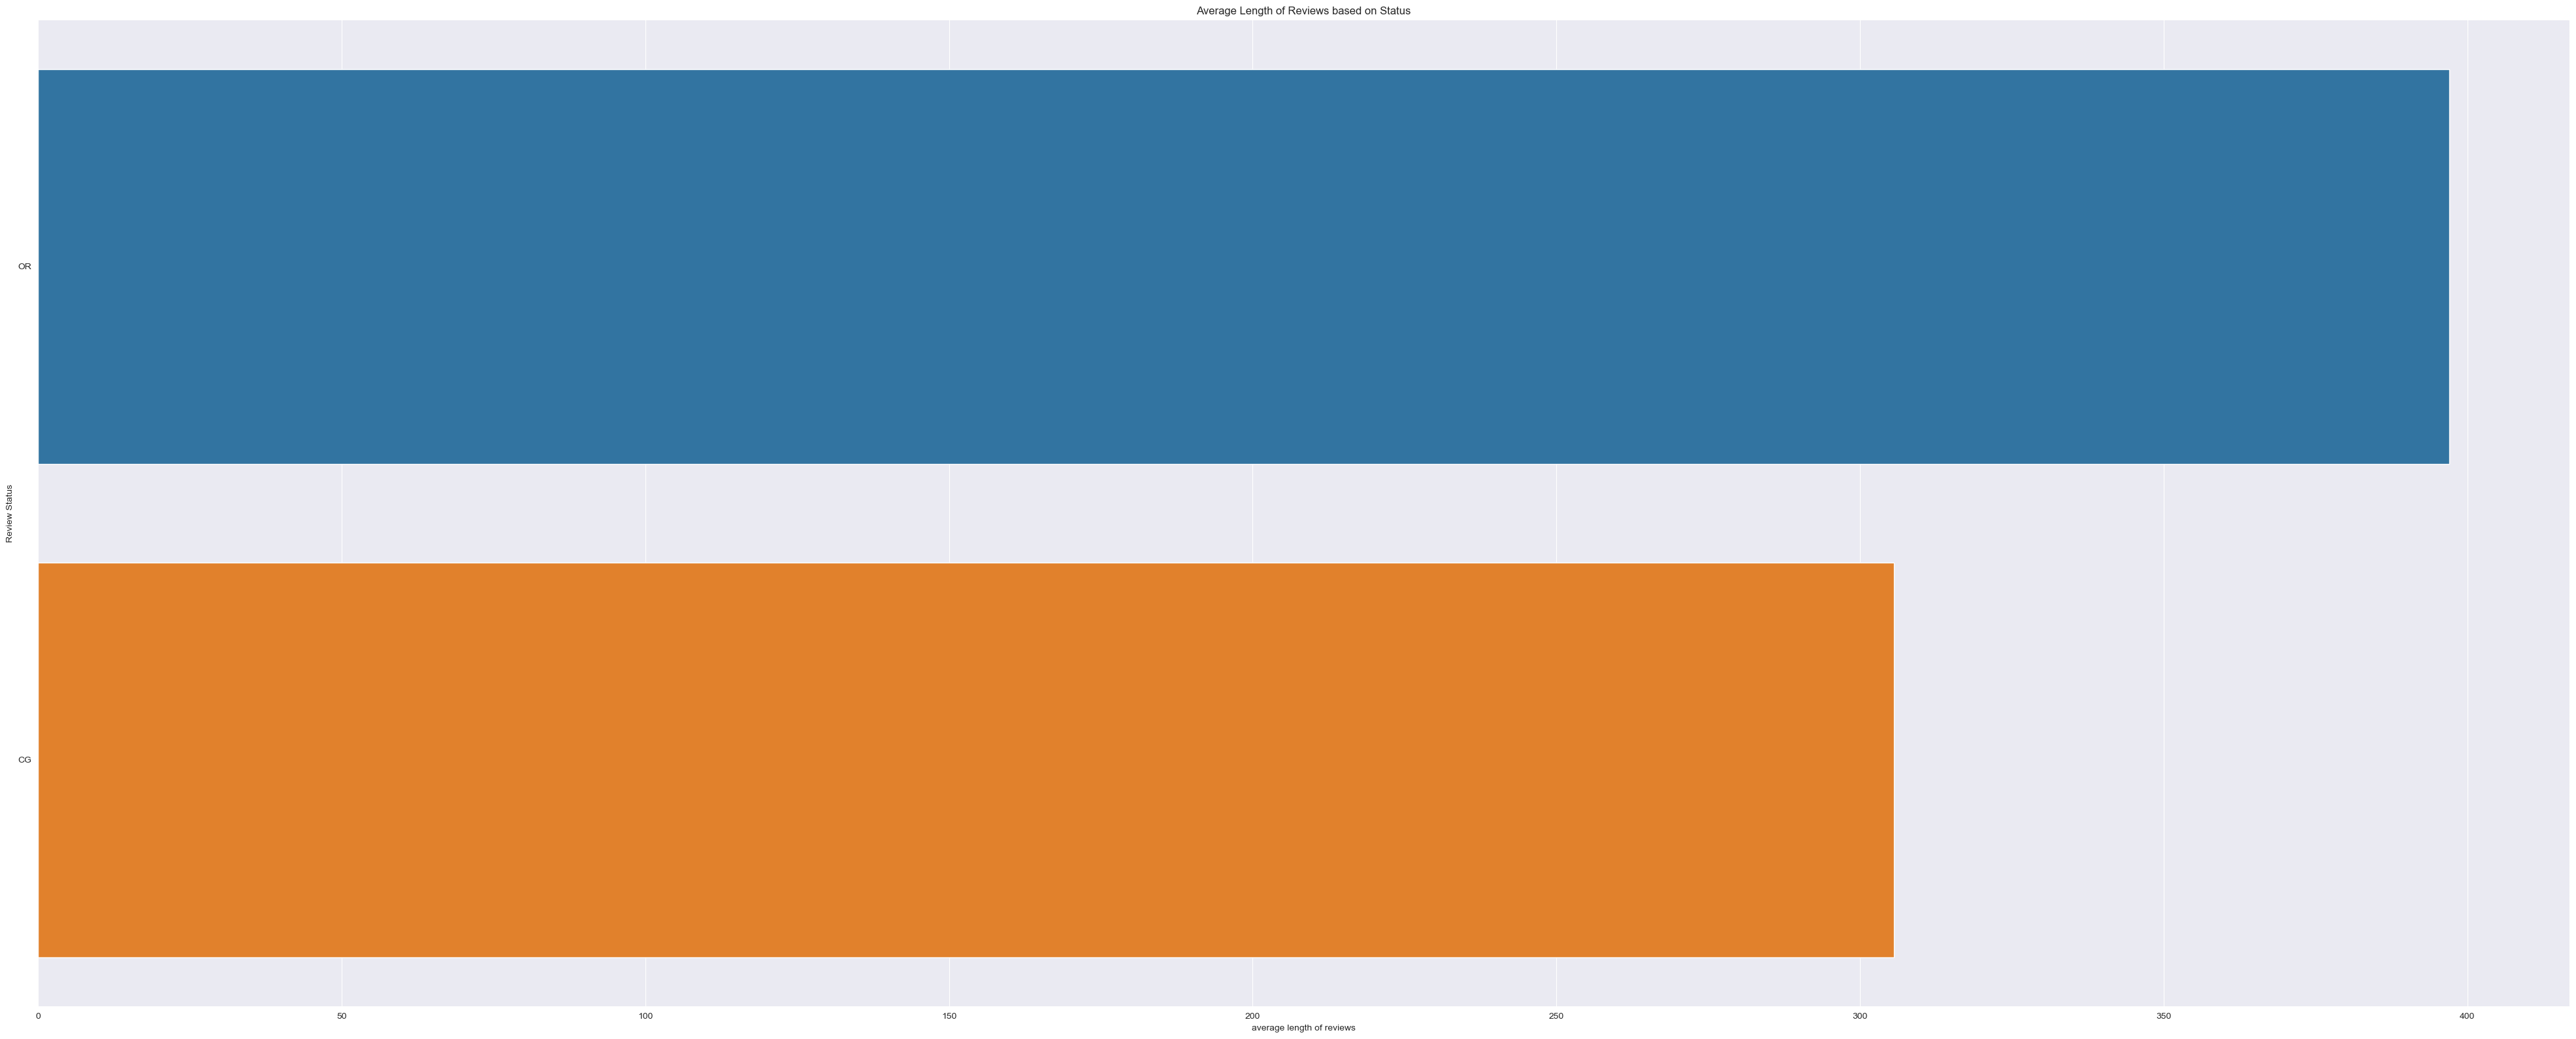

In [58]:
cols = ["label", "text_"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["label"] == "OR"
filtered_true = vprt[checkTrue]

checkFalse = vprt["label"] == "CG"
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
CG_average_length = filtered_false["text_"].apply(len).mean()
OR_average_length = filtered_true["text_"].apply(len).mean()

#PLOTTING THE GRAPH
sns.barplot(x = [OR_average_length,CG_average_length] , y= ["OR", "CG"], data=df)
plt.xlabel("average length of reviews")
plt.ylabel("Review Status")
plt.title("Average Length of Reviews based on Status")
plt.show()

## PRE-PROCESSING

#### Removing Duplicates

In [8]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  12


In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
#checking if the duplicate values are dropped
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


In [11]:
df.describe()

,rating
count,40420.000000
mean,4.256358
std,1.144452
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


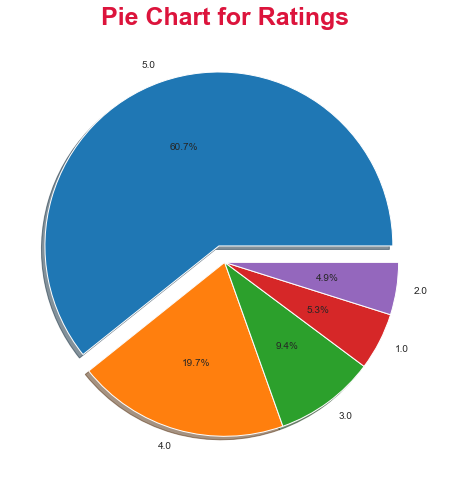

In [12]:
plt.figure(figsize=(10,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Pie Chart for Ratings',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kpatel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Exploratory Data Analysis

In [14]:
#WORD COUNT
df['total words'] = df['text_'].apply(lambda i: len(str(i).split(" ")))

#CHARACTER COUNT
df['total characters'] = df['text_'].str.len() #spaces are included

#STOPWORDS COUNT
sw = set(stopwords.words('english'))
df['total stopwords'] = df['text_'].str.split().apply(lambda i: len(set(i) & sw))

#PUNCTUATION AND SPECIAL CHARA COUNT
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total punctuations'] = df.text_.apply(lambda p: count_p(p, string.punctuation))

#UPPERCASE CHARA COUNT
df['total uppercases'] = df['text_'].str.findall(r'[A-Z]').str.len() #findall - finds all

In [15]:
df.head() #UPDATED 

,category,rating,label,text_,total words,total characters,total stopwords,total punctuations,total uppercases
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",14,75,2,5,4
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",17,80,6,3,1
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,14,67,5,2,2
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",18,81,9,2,2
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,18,85,8,2,3


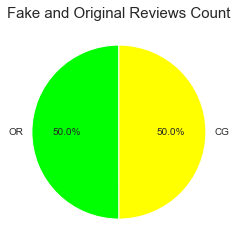

In [16]:
#PIE CHART ON Fake or Original Label -two
colors = ['#00FF00','#FFFF00']
plt.figure(figsize=(4,4))
label = df['label'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('Fake and Original Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Rating Grouped by Label')

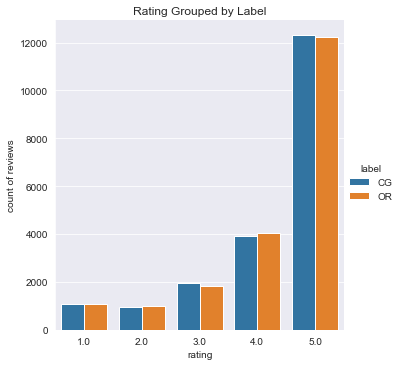

In [17]:
sns.catplot(x ='rating',kind="count", hue="label", data=df)
plt.xlabel("rating")
plt.ylabel("count of reviews")
plt.title("Rating Grouped by Label")

In [18]:
#DROP UNNECESSARY COLUMNS
df.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases"], axis=1, inplace=True)
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


#### Removing punctuation character

Punctuation marks used at the starting and ending of the reviews are removed along
with additional white spaces.

In [19]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [20]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [21]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [22]:
df['text_'] = df['text_'].astype(str)

#### Eliminating stopwords, digits and punctuation

In [23]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kpatel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kpatel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [27]:
df['text_'] = df['text_'].apply(preprocess)

#### Transforming text to lower case

In [28]:
df['text_'] = df['text_'].str.lower()

#### Stemming

In [29]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kpatel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Lemmatizing

The task of lemmatizer is to transform word with respect to morphological root word e.g.’bought’ lemmatized into ’buy’.

In [31]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [32]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [33]:
df.to_csv('preprocessed_dataset_fake_review_detector.csv')

## Feature Extraction

Feature Extraction or Feature Engineering is finding a numeric representation of text documents like reviews in this case. In some cases the extraction of counts feature work better and in others the tfidf representation is the best choice. Combining these two techniques helps in achieving better precision by using the full set of features(tfidf+counts).

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [35]:
df = pd.read_csv('preprocessed_dataset_fake_review_detector.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


#### Vectorization 
Vectorization is the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words.

In [36]:
vectorizer = CountVectorizer(analyzer='word')
count_vectorized = vectorizer.fit_transform(df['text_'][20:24].values.astype('U'))
print(len(vectorizer.get_feature_names_out()))

20


In [37]:
pd.DataFrame(count_vectorized.toarray(), 
             index=['review '+str(i) 
                    for i in range(20, 24)],
             columns=vectorizer.get_feature_names_out())

,advertis,also,color,dimens,easi,egg,exactli,fantast,feel,great,littl,look,love,masher,month,pictur,pillow,use,want,we
review 20,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1
review 21,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
review 22,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0
review 23,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0


#### TF-IDF 
TF-IDF is the importance of a term which is inversely related to its frequency across documents.TF gives us information on how often a term appears in a document and IDF gives us information about the relative rarity of a term in the collection of documents.

In [38]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_vectorized = tfidf_transformer.fit_transform(count_vectorized)

In [39]:
pd.DataFrame(tfidf_vectorized.toarray(), 
             index=['review '+str(i) 
                    for i in range(20,24)],
             columns=vectorizer.get_feature_names_out())

,advertis,also,color,dimens,easi,egg,exactli,fantast,feel,great,littl,look,love,masher,month,pictur,pillow,use,want,we
review 20,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.00000,0.00000,0.000000,0.408248,0.408248,0.000000,0.000000,0.408248,0.408248,0.00000,0.000000,0.000000,0.00000,0.408248
review 21,0.395056,0.395056,0.395056,0.395056,0.395056,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.252159,0.000000,0.000000,0.00000,0.000000,0.395056,0.00000,0.000000
review 22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.48381,0.00000,0.381441,0.000000,0.000000,0.381441,0.308810,0.000000,0.000000,0.48381,0.381441,0.000000,0.00000,0.000000
review 23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.48381,0.381441,0.000000,0.000000,0.381441,0.308810,0.000000,0.000000,0.00000,0.381441,0.000000,0.48381,0.000000


In [40]:
count_vectorized = vectorizer.fit_transform(df['text_'].values.astype('U'))
print(len(vectorizer.get_feature_names_out()))

29491


In [41]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
vectorized = tfidf_transformer.fit_transform(count_vectorized)

In [42]:
print("Number of non zero tokens in the countvectorize (bag of words) model:",count_vectorized.nnz)

Number of non zero tokens in the countvectorize (bag of words) model: 1082662


In [43]:
cv = vectorizer.fit(df['text_'].values.astype('U'))
print("Inverse document-frequency of word 'poor'- ",tfidf_transformer.idf_[cv.vocabulary_['poor']])
print("Inverse document-frequency of word 'love'- ",tfidf_transformer.idf_[cv.vocabulary_['love']])
print("Inverse document-frequency of word 'hate'- ",tfidf_transformer.idf_[cv.vocabulary_['hate']])
print("Inverse document-frequency of word 'good'- ",tfidf_transformer.idf_[cv.vocabulary_['good']])
print("Inverse document-frequency of word 'quality'- ",tfidf_transformer.idf_[cv.vocabulary_['quality']])

Inverse document-frequency of word 'poor'-  6.054145145957571
Inverse document-frequency of word 'love'-  2.258394689638233
Inverse document-frequency of word 'hate'-  5.997632935694228
Inverse document-frequency of word 'good'-  2.4470055753397517
Inverse document-frequency of word 'quality'-  6.962713831737815


### Sentiment Analysis

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kpatel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
for review in df['text_'][0:5].values.astype('U'):
    print(review)
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(review)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

love well made sturdi comfort i love veri pretti
compound: 0.9186, neg: 0.0, neu: 0.235, pos: 0.765, 
love great upgrad origin i 've mine coupl year
compound: 0.8519, neg: 0.0, neu: 0.42, pos: 0.58, 
thi pillow save back i love look feel pillow
compound: 0.8126, neg: 0.0, neu: 0.448, pos: 0.552, 
miss inform use great product price i
compound: 0.5423, neg: 0.165, neu: 0.412, pos: 0.423, 
veri nice set good qualiti we set two month
compound: 0.6908, neg: 0.0, neu: 0.551, pos: 0.449, 


In [46]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


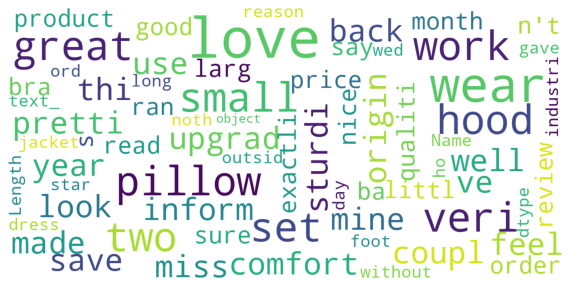

In [47]:
# wordcloud function to show which words occur the most

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df['text_'])


#### Splitting Test dataset and Train dataset

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df['text_'].values.astype('U'),df['label'].values.astype('U'),test_size=0.40)

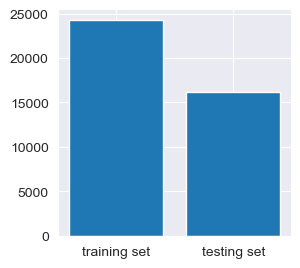

In [72]:
names = ['training set', 'testing set']
values = [len(X_train), len(X_test)]


plt.figure(figsize=(3, 3))
plt.bar(names, values)
plt.show()


#### Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [50]:
pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [51]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [52]:
mnb_pred = pipeline.predict(X_test)
mnb_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'OR', 'CG'], dtype='<U2')

Accuracy is a ratio of correctly predicted observation to the total observations. 
High precision relates to the low false positive rate. Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. F1 Score is the weighted average of Precision and Recall.

In [53]:
mnb_cr = classification_report(y_test,mnb_pred, output_dict=True)
mnb_cm = confusion_matrix(y_test,mnb_pred)
mnb_as = accuracy_score(y_test,mnb_pred)
mnb_mpa = str(np.round(accuracy_score(y_test,mnb_pred)*100,2)) + '%'

# Classification Report
pd.DataFrame(mnb_cr).T

,precision,recall,f1-score,support
CG,0.821062,0.899123,0.858322,8099.000000
OR,0.888067,0.803321,0.843571,8069.000000
accuracy,0.851311,0.851311,0.851311,0.851311
macro avg,0.854564,0.851222,0.850946,16168.000000
weighted avg,0.854502,0.851311,0.850960,16168.000000


In [54]:
print('Confusion Matrix:',mnb_cm)

Confusion Matrix: [[7282  817]
 [1587 6482]]


In [55]:
print('Accuracy Score:',mnb_as)
print('Model Prediction Accuracy:',mnb_mpa)

Accuracy Score: 0.851311232063335
Model Prediction Accuracy: 85.13%


#### Training and testing Support Vector Machine Algorithm on the preprocessed data

In [56]:
from sklearn.svm import SVC

In [57]:
pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [58]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [59]:
svc_pred = pipeline.predict(X_test)
svc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'OR', 'OR'], dtype='<U2')

In [60]:
svc_cr = classification_report(y_test,svc_pred,output_dict=True)
svc_cm = confusion_matrix(y_test,svc_pred)
svc_as = accuracy_score(y_test,svc_pred)
svc_mpa = str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%'

# Classification Report
pd.DataFrame(svc_cr).T

,precision,recall,f1-score,support
CG,0.909738,0.867391,0.888060,8099.000000
OR,0.872839,0.913620,0.892764,8069.000000
accuracy,0.890463,0.890463,0.890463,0.890463
macro avg,0.891289,0.890506,0.890412,16168.000000
weighted avg,0.891323,0.890463,0.890408,16168.000000


In [61]:
print('Confusion Matrix:',svc_cm)

Confusion Matrix: [[7025 1074]
 [ 697 7372]]


In [62]:
print('Accuracy Score:',svc_as)
print('Model Prediction Accuracy:',svc_mpa)

Accuracy Score: 0.8904626422563088
Model Prediction Accuracy: 89.05%


#### Training and testing Random Forest Classifier on the preprocessed data

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [65]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [66]:
rfc_pred = pipeline.predict(X_test)
rfc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'OR', 'CG'], dtype='<U2')

In [67]:
rfc_cr = classification_report(y_test,rfc_pred,output_dict=True)
rfc_cm = confusion_matrix(y_test,rfc_pred)
rfc_as = accuracy_score(y_test,rfc_pred)
rfc_mpa = str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%'

# Classification Report
pd.DataFrame(rfc_cr).T

,precision,recall,f1-score,support
CG,0.836770,0.896901,0.865793,8099.000000
OR,0.888473,0.824390,0.855233,8069.000000
accuracy,0.860713,0.860713,0.860713,0.860713
macro avg,0.862622,0.860645,0.860513,16168.000000
weighted avg,0.862574,0.860713,0.860522,16168.000000


In [68]:
print('Confusion Matrix:',rfc_cm)

Confusion Matrix: [[7264  835]
 [1417 6652]]


In [69]:
print('Accuracy Score:',rfc_as)
print('Model Prediction Accuracy:',rfc_mpa)

Accuracy Score: 0.8607125185551707
Model Prediction Accuracy: 86.07%


#### Comparison of Performance

In [70]:
model_accuracy={'MNB': [mnb_mpa],
                'SVM': [svc_mpa],
                'RFC': [rfc_mpa]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','RFC'], index=['Model Prediction Accuracy'])
ma

,MNB,SVM,RFC
Model Prediction Accuracy,85.13%,89.05%,86.07%


#### saving the best model

In [71]:
import pickle

In [72]:
pipeline_svc = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC(probability=True))
])

In [73]:
pipeline_svc.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC(probability=True))])

In [74]:
svc_pred = pipeline_svc.predict(X_test)

In [75]:
pickle.dump(pipeline_svc, open('pickle model/best_model.pkl','wb'))